Let's observe the bias-variance trade-off with simulated data (bias in this case is the error with respect to our model of the data rather than biasedness in the coefficient estimation sense. $E[\hat{\beta}] = \beta$ vs $E[f(x) - \hat{f}(x)]$

Polynomial function (k) - 1 -> 40
Observe test_error for each of these functions

X ~ [-3,3] \\
Y = 10*x + N(0,0.2) \\
X = np.linspace(-3, 3, 100) \\
y = 10*x + np.random.normal(0, 0.2, size= X.shape)

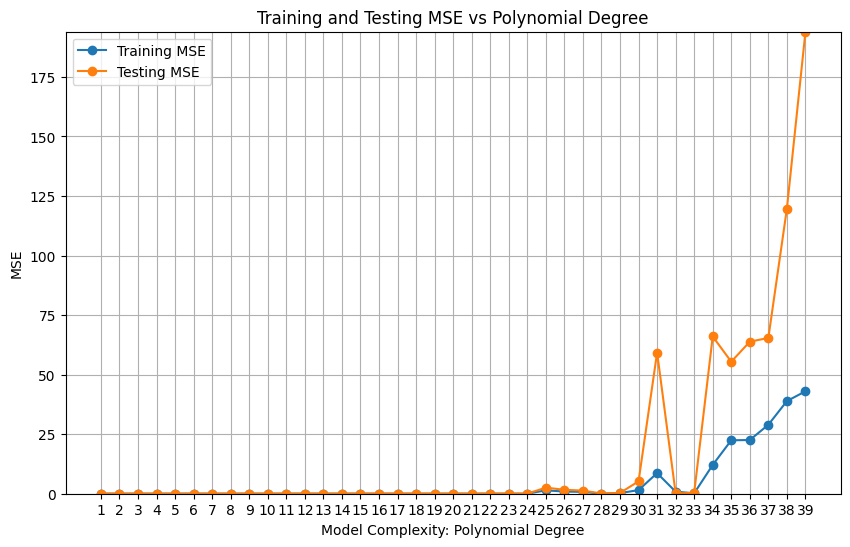

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 10*x + np.random.normal(0,0.2, x.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

degrees = np.arange(1, 40)  # Polynomial degrees from 1 to 14
train_mse = []
test_mse = []


for k in degrees:
    poly_features = PolynomialFeatures(degree=k)
    x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
    x_test_poly = poly_features.transform(x_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))


plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, marker='o', label='Training MSE')
plt.plot(degrees, test_mse, marker='o', label='Testing MSE')
plt.title('Training and Testing MSE vs Polynomial Degree')
plt.xlabel('Model Complexity: Polynomial Degree')
plt.ylabel('MSE')
plt.xticks(degrees)
plt.ylim(0, max(max(train_mse), max(test_mse)) + 0.1)  # Set y-axis limits
plt.grid()
plt.legend()
plt.show()


Calculate bias and variance separately

Try polynomial regressions of degrees 1, 3, 5, 7, 9, 12, 20, 40 and create a list of test and train errors.

In the discussion slides, Assignment 1 part 1 wants you to do this for multiple datasets and keep track of the bias and variance for:

n = 50000 samples
N = 1000 iterations
Functions = Polynomials of 1 to 7


Moving on to K-nearest neighbors. Classification problem, hyperparamter - k
X_train data - ([1,2],
                [.5,.3])
y_train data - labels (0,1)

x_test data ([1,3]) -> Find label y

- Train our KNN model
- When we get a new test X
- Calculate Euclidean distance of new test X from every single train X we have
- Sort this vector and find k closest points to our test X
- Find labels of k closest points -> majority class is our prediction

y_test -> true labels
y_predicted -> predicted labels

Accuracy measures:
Precision
Recall
F-1 score
Accuracy (Confusion matrices)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 2,cluster_std = 4, random_state = 2)

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '+',s=100,edgecolors='black')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# fit on my train data
# predictions on x_test data -> y_pred
# compare to y_test
print(X_train.shape)

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors = 3)

knn3.fit(X_train, y_train)

y_pred_3 = knn3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)

How do we do this in a loop to get the graph on Page 17 of the Lec 1 Thursday notes?

In [ ]:
accuracy = np.zeros(9)
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy[i-1] = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
plt.plot(range(1,10), accuracy, marker = 'o')
plt.show()

In [ ]:
from sklearn import metrics
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 2,cluster_std = 4, random_state = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

actual = y_test
predicted = y_pred

#print("Accuracy with k=3", accuracy_score(y_test, y_pred)*100)
print(metrics.confusion_matrix(actual, predicted))





Let's calculate precision and recall. Two arguably better accuracy measures over straight up accuracy. If we were asked to do this from scratch, what would be the right pseudocode


In class imbalanced datasets, accuracy can be misleading so we can output stuff like f1 scores, precision, recall

F1 - balance between precision and recall: $\frac{2}{1/precision + 1/recall}$

Precision - predicted positives that are actual positives/ predicted positives (44/(44+13))
Recall - Actual positives that were predicted positive/actual positives (44/(44+9))